Creating the model

In [8]:
from keras.datasets import mnist

# Loading the MNIST dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

print(xTrain.shape)

(60000, 28, 28)


Examining the size and dimension of the images 

In [9]:
print("Initial shape of dimensions of xTrain : {}\n".format(xTrain.shape))

print("Number of samples in the training data {}".format(len(xTrain)))
print("Number of labels in the training data {}".format(len(yTrain)))
print("Number of samples in the test data {}".format(len(xTest)))
print("Number of labels in the test data {}\n".format(len(yTest)))

print("Dimension of the xTrain : {}".format(xTrain[0].shape))
print("Labels in xTrain : {}\n".format(yTrain.shape))

print("Dimension of the xTest : {}".format(xTest[0].shape))
print("Labels in xTest : {}\n".format(yTest.shape))

Initial shape of dimensions of xTrain : (60000, 28, 28)

Number of samples in the training data 60000
Number of labels in the training data 60000
Number of samples in the test data 10000
Number of labels in the test data 10000

Dimension of the xTrain : (28, 28)
Labels in xTrain : (60000,)

Dimension of the xTest : (28, 28)
Labels in xTest : (10000,)



Let's take a look in some images using OpenCV and Matplotlib

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ploting the images using OpenCV
for i in range(0, 6):
    
    randNum = np.random.randint(0, len(xTrain))
    img = xTrain[randNum]
    windowName = "Random sample " + str(i)
    cv2.imshow(windowName, img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

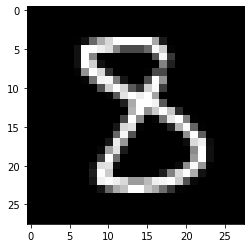

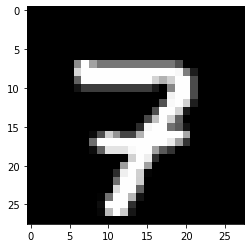

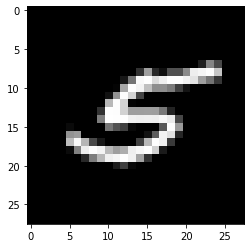

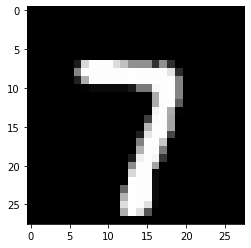

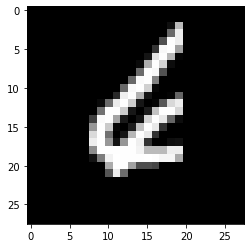

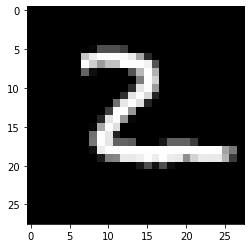

In [11]:
# Ploting some images using matplotlib
for i in range(0, 6):
    plt.subplot()
    randNum = np.random.randint(0, len(xTrain))
    plt.imshow(xTrain[randNum], cmap = plt.get_cmap("gray"))
    plt.show()

Let's adjust the data to our model using the format (number of sample, rows, cols, depth -> number of channels)

In [12]:
# Saving the number of rows and columns of the training dataset
imgRows = xTrain[0].shape[0]
imgCols = xTrain[0].shape[1]

# Changing the data to (60000, 28, 28, 1)
xTrain = xTrain.reshape(xTrain.shape[0], imgRows, imgCols, 1)
xTest = xTest.reshape(xTest.shape[0], imgRows, imgCols, 1)

# Storing the shape of a single image
inputShape = (imgRows, imgCols, 1)

# Changing the data type to float32
xTrain = xTrain.astype("float32")
xTest = xTest.astype("float32")

# Normalizing the image to binary values
xTrain /= 255
xTest /= 255

print("xTrain shape : {}".format(xTrain.shape))
print("Number of training samples : {}".format(xTrain.shape[0]))
print("Number of test samples : {}".format(xTest.shape[0]))

xTrain shape : (60000, 28, 28, 1)
Number of training samples : 60000
Number of test samples : 10000


Creating the Hot one encoding

In [13]:
from keras.utils import np_utils

yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

print("Number of classes : {}".format(yTest.shape[1]))

numClasses = yTest.shape[1]
numPixels = xTrain.shape[1] * xTrain.shape[2]


Number of classes : 10


Creating our model

In [14]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD

# Create model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = "relu", input_shape = inputShape))
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(numClasses, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

Training the model

In [8]:
batchSize = 32
epochs = 5

history = model.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2552 - acc: 0.9223 - val_loss: 0.0666 - val_acc: 0.9783
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1024 - acc: 0.9700 - val_loss: 0.0442 - val_acc: 0.9849
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0776 - acc: 0.9767 - val_loss: 0.0426 - val_acc: 0.9848
Epoch 4/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0624 - acc: 0.9812 - val_loss: 0.0360 - val_acc: 0.9872
Epoch 5/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0363 - val_acc: 0.9875
Test Loss : 0.03628199215535715
Test accuracy : 0.9875


Ploting our Loss and Accuracy Charts

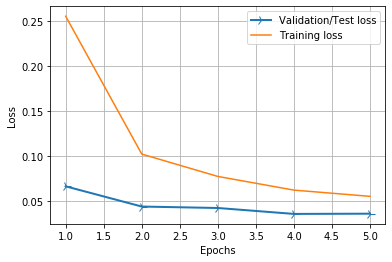

In [11]:
# Ploting the Loss Charts 
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

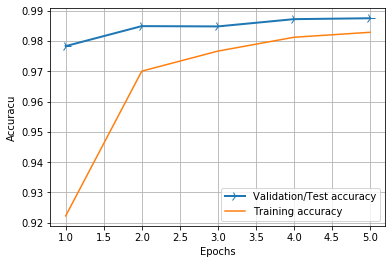

In [13]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracu")
plt.grid(True)
plt.legend()
plt.show()

Saving our model

In [14]:
model.save("./mnistModelSave.h5")

Loading our model

In [15]:
from keras.models import load_model

classifier = load_model("./mnistModelSave.h5")

Let's input some of the test data into this loaded model

In [16]:
import numpy as np
import cv2

def drawTest(name, pred, inputIm):
    
    black = [0, 0, 0]
    expIm = cv2.copyMakeBorder(inputIm, 0, 0, 0, inputIm.shape[0], cv2.BORDER_CONSTANT, value = black)
    expIm = cv2.cvtColor(expIm, cv2.COLOR_GRAY2BGR)
    cv2.putText(expIm, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expIm)
    
for i in range(0, 10):
        
        rand = np.random.randint(0, len(xTest))
        inputIm = xTest[rand]
        
        imageL = cv2.resize(inputIm, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
        inputIm = inputIm.reshape(1, 28, 28, 1)
        
        # Getting the prediction
        res = str(classifier.predict_classes(inputIm, 1, verbose = 0)[0])
        
        drawTest("Prediction", res, imageL)
        cv2.waitKey(0)

cv2.destroyAllWindows()

Generating the diagram of the model architecture

In [20]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

# Saving the model diagram on this path
modelDiagramPath = "./TrainedModel/"

# Creating the plot
plot_model (model, to_file = modelDiagramPath + "modelPlot.pdf",
             show_shapes = True, show_layer_names = True)

# Show the plot here
img = mpimg.imread("TrainedModel/modelPlot.pdf")
plt.figure(figsize = (30, 15))
imgplot = plt.imshow(img)

OSError: cannot identify image file 'TrainedModel/modelPlot.pdf'